##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE224090**

file previously downloaded:
GSE224090_RAW.tar

unzipped using 
``` bash
tar -xvf GSE224090_RAW.tar
```

This gives the following files:                         
* GSM7011673_NU02954_PBMC.filtered_feature_bc_matrix.h5
* GSM7011674_NU02954_Tumor.filtered_feature_bc_matrix.h5
* GSM7011675_NU03014_PBMC.filtered_feature_bc_matrix.h5
* GSM7011676_NU03014_Tumor.filtered_feature_bc_matrix.h5

##### only using the two tumour samples (not the PBMC) 

                    


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE224090')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE224090"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
library(hdf5r)

In [4]:
#load all datasets
NU02954.data <- Read10X_h5("GSM7011674_NU02954_Tumor.filtered_feature_bc_matrix.h5")
NU03014.data <- Read10X_h5("GSM7011676_NU03014_Tumor.filtered_feature_bc_matrix.h5")


In [5]:
head(colnames(NU02954.data))
head(colnames(NU03014.data))

[1] "AAACCTGAGAGTACCG-1" "AAACCTGCAGCCTATA-1" "AAACCTGCAGCGTAAG-1"
[4] "AAACCTGCAGCTATTG-1" "AAACCTGGTAAATACG-1" "AAACCTGGTGCGAAAC-1"

[1] "AAACCTGAGAGTGACC-1" "AAACCTGAGATACACA-1" "AAACCTGAGATGTGGC-1"
[4] "AAACCTGAGCTAAGAT-1" "AAACCTGAGGCTAGGT-1" "AAACCTGAGTAGCCGA-1"

In [6]:
#Add dataset info to colnames
colnames(NU02954.data) <- paste0("GSE224090_GBM_NU02954_", colnames(NU02954.data))
colnames(NU03014.data) <- paste0("GSE224090_GBM_NU03014_", colnames(NU03014.data))


In [7]:
head(colnames(NU02954.data))
head(colnames(NU03014.data))

[1] "GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1"
[2] "GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1"
[3] "GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1"
[4] "GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1"
[5] "GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1"
[6] "GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1"

[1] "GSE224090_GBM_NU03014_AAACCTGAGAGTGACC-1"
[2] "GSE224090_GBM_NU03014_AAACCTGAGATACACA-1"
[3] "GSE224090_GBM_NU03014_AAACCTGAGATGTGGC-1"
[4] "GSE224090_GBM_NU03014_AAACCTGAGCTAAGAT-1"
[5] "GSE224090_GBM_NU03014_AAACCTGAGGCTAGGT-1"
[6] "GSE224090_GBM_NU03014_AAACCTGAGTAGCCGA-1"

In [8]:
#create seperate seurat object for each sample
NU02954 <- CreateSeuratObject(counts = NU02954.data, project = "GSE224090", min.features = 200)
#add metadata to sample
NU02954@meta.data$sample_type <- "tumour"
NU02954@meta.data$cancer_type <- "GBM"
NU02954@meta.data$patient_id <- "pt-NU02954"
NU02954@meta.data$sample_id <- "GSE224090_GBM_NU02954"

In [9]:
#create seperate seurat object for each sample
NU03014 <- CreateSeuratObject(counts = NU03014.data, project = "GSE224090", min.features = 200)
#add metadata to sample
NU03014@meta.data$sample_type <- "tumour"
NU03014@meta.data$cancer_type <- "GBM"
NU03014@meta.data$patient_id <- "pt-NU03014"
NU03014@meta.data$sample_id <- "GSE224090_GBM_NU03014"

In [10]:
head(NU02954@meta.data) 
head(NU03014@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090   2350      1233        
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090   5452      1957        
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090   3364      1633        
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090  14321      3352        
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090   3694      1587        
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090   4302      1617        
                                         sample_type cancer_type patient_id
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 tumour      GBM         pt-NU02954
                                         sample_id            
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090_GBM_NU02954

orig.ident nCount_RNA nFeature_RNA
GSE224090_GBM_NU03014_AAACCTGAGAGTGACC-1 GSE224090   3532      1386        
GSE224090_GBM_NU03014_AAACCTGAGATACACA-1 GSE224090  11723      2794        
GSE224090_GBM_NU03014_AAACCTGAGATGTGGC-1 GSE224090   4738      1715        
GSE224090_GBM_NU03014_AAACCTGAGCTAAGAT-1 GSE224090   3362      1449        
GSE224090_GBM_NU03014_AAACCTGAGGCTAGGT-1 GSE224090   2423      1126        
GSE224090_GBM_NU03014_AAACCTGAGTAGCCGA-1 GSE224090   5443      2020        
                                         sample_type cancer_type patient_id
GSE224090_GBM_NU03014_AAACCTGAGAGTGACC-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_AAACCTGAGATACACA-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_AAACCTGAGATGTGGC-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_AAACCTGAGCTAAGAT-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_AAACCTGAGGCTAGGT-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_AAACCTGAGTAGCCGA-1 tumour      GBM         pt-NU03014
                                         sample_id            
GSE224090_GBM_NU03014_AAACCTGAGAGTGACC-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_AAACCTGAGATACACA-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_AAACCTGAGATGTGGC-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_AAACCTGAGCTAAGAT-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_AAACCTGAGGCTAGGT-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_AAACCTGAGTAGCCGA-1 GSE224090_GBM_NU03014

In [11]:
#Merge seurat objects
GBM <- merge(NU02954, y = NU03014, project = "GSE224090")

In [12]:
GBM
head(GBM@meta.data)
tail(GBM@meta.data)

An object of class Seurat 
36601 features across 20913 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 2 layers present: counts.1, counts.2

orig.ident nCount_RNA nFeature_RNA
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090   2350      1233        
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090   5452      1957        
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090   3364      1633        
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090  14321      3352        
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090   3694      1587        
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090   4302      1617        
                                         sample_type cancer_type patient_id
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 tumour      GBM         pt-NU02954
                                         sample_id            
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090_GBM_NU02954
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090_GBM_NU02954

orig.ident nCount_RNA nFeature_RNA
GSE224090_GBM_NU03014_TTTGTCATCACATAGC-1 GSE224090  2757       1200        
GSE224090_GBM_NU03014_TTTGTCATCATCGGAT-1 GSE224090  2683       1287        
GSE224090_GBM_NU03014_TTTGTCATCGACGGAA-1 GSE224090  4509       1796        
GSE224090_GBM_NU03014_TTTGTCATCGGCTACG-1 GSE224090  2773       1463        
GSE224090_GBM_NU03014_TTTGTCATCTAACTCT-1 GSE224090  3208       1352        
GSE224090_GBM_NU03014_TTTGTCATCTGCGGCA-1 GSE224090  5417       1613        
                                         sample_type cancer_type patient_id
GSE224090_GBM_NU03014_TTTGTCATCACATAGC-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_TTTGTCATCATCGGAT-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_TTTGTCATCGACGGAA-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_TTTGTCATCGGCTACG-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_TTTGTCATCTAACTCT-1 tumour      GBM         pt-NU03014
GSE224090_GBM_NU03014_TTTGTCATCTGCGGCA-1 tumour      GBM         pt-NU03014
                                         sample_id            
GSE224090_GBM_NU03014_TTTGTCATCACATAGC-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_TTTGTCATCATCGGAT-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_TTTGTCATCGACGGAA-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_TTTGTCATCGGCTACG-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_TTTGTCATCTAACTCT-1 GSE224090_GBM_NU03014
GSE224090_GBM_NU03014_TTTGTCATCTGCGGCA-1 GSE224090_GBM_NU03014

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


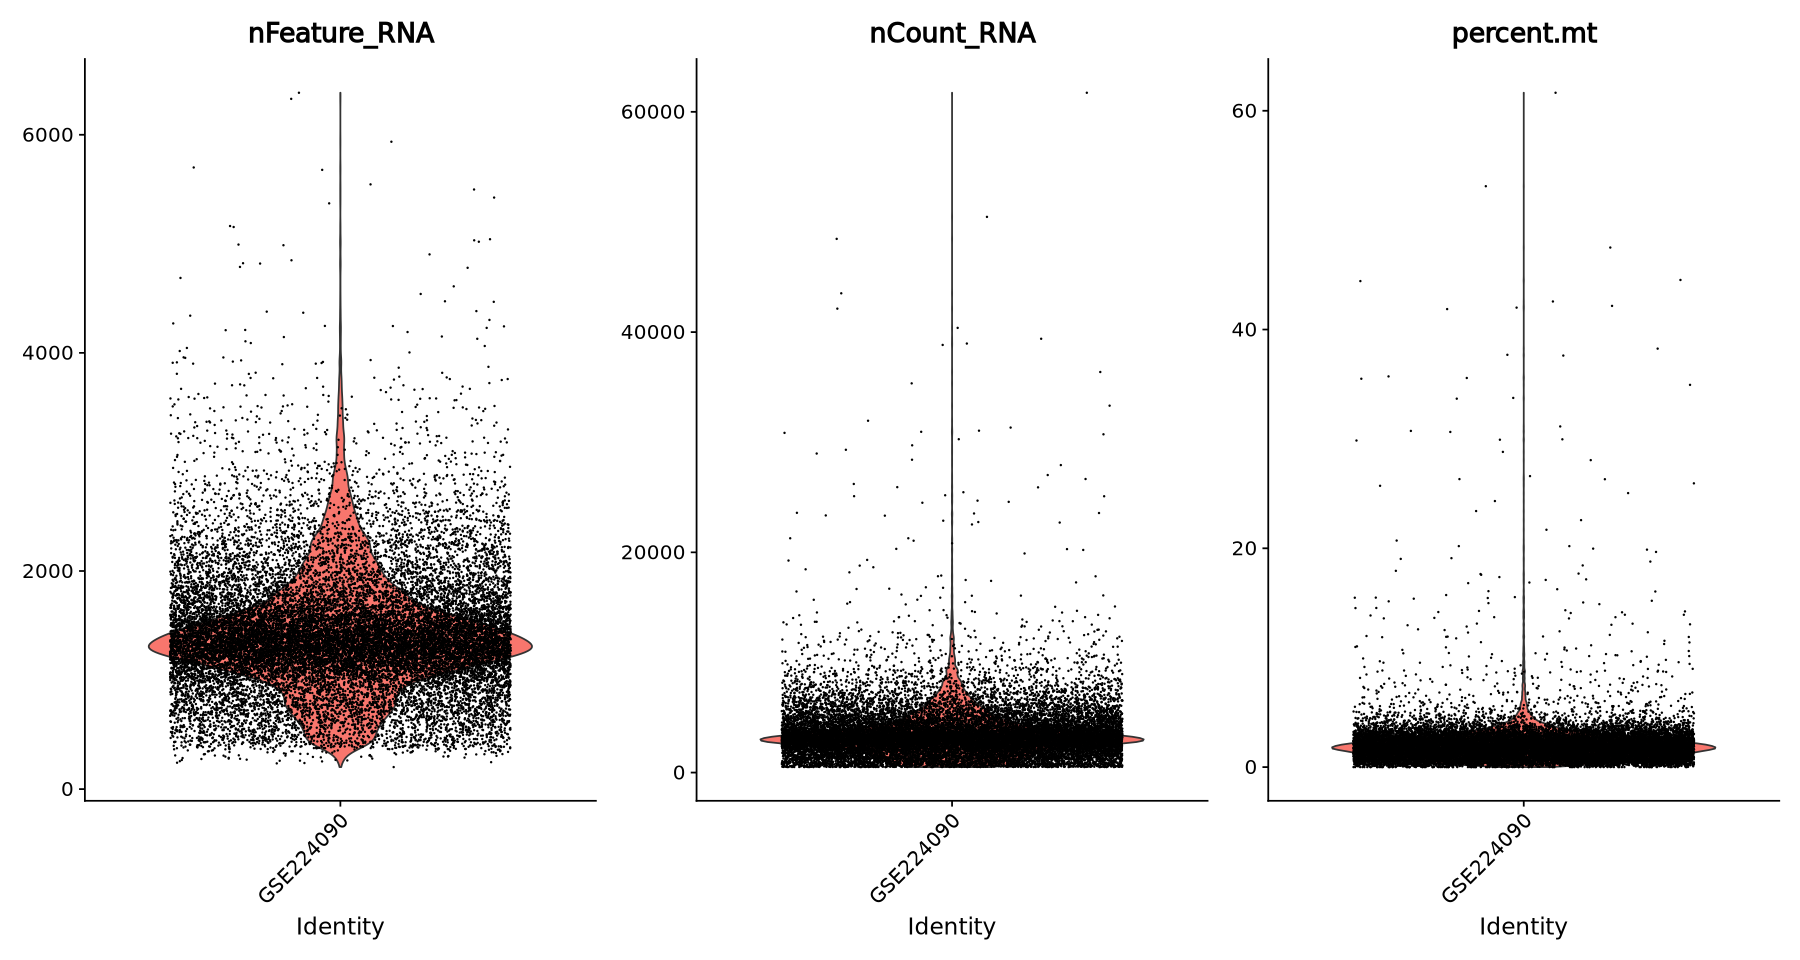

In [13]:
#QC Steps 
GBM[["percent.mt"]] <- PercentageFeatureSet(GBM, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(GBM, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [14]:
#Normalise the data
GBM <- NormalizeData(GBM)
#Find variable features
GBM <- FindVariableFeatures(GBM, selection.method = "vst", nfeatures = 2000)
#Scale the data
GBM <- ScaleData(GBM, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
GBM <- RunPCA(GBM, features = VariableFeatures(object = GBM))

Normalizing layer: counts.1

Normalizing layer: counts.2

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  CD74, FTL, TYROBP, S100A11, SAT1, HLA-DRB1, HLA-DPA1, HLA-DRA, FCER1G, AIF1 
	   C1QC, C1QB, C1QA, NPC2, CD68, RPLP1, IFI30, SPI1, APOC1, HLA-DRB5 
	   CTSB, APOC2, CD14, CAPG, CYBB, HLA-DPB1, HLA-DQB1, GLDN, CTSS, MS4A7 
Negative:  PTN, C1orf61, PTPRZ1, TUBB2B, SOX2, UCHL1, NOVA1, BCAN, TUBB3, SCRG1 
	   MARCKSL1, CDK4, GPM6A, PCSK1N, MAP2, MAP1B, GPM6B, PFN2, DLL3, NFIB 
	   PHYHIPL, DNER, IGFBP2, RBP1, CPE, DPYSL3, STMN2, NRCAM, SOX4, TUBA1A 
PC_ 2 
Positive:  SPP1, APOE, C1QC, C1QB, CTSB, C1QA, CST3, APOC1, MARCKS, FOS 
	   FTL, AIF1, APOC2, CD68, SAT1, S100A11, FTH1, CD14, CAPG, GLDN 
	   IFI30, NPC2, PSAP, TMIGD3, PLXDC2, MS4A7, VSIG4, IFI6, SPI1, SERPINA1 
Negative:  CXCR4, NKG7, IFITM1, CST7, GZMA, CTSW, PRF1, GNLY, ISG20, CCL5 
	   KLRD1, 

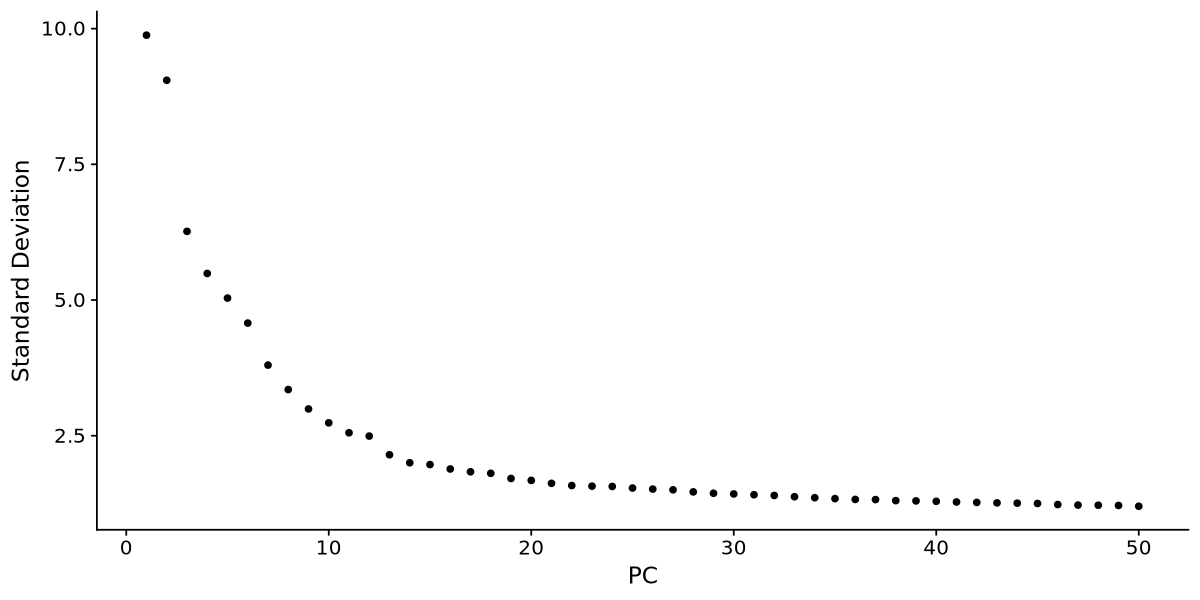

In [15]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(GBM, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [16]:
#Find neighbours (make sure number matches no. features chosen above)
GBM <- FindNeighbors(GBM, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [17]:
#Run UMAP
GBM <- RunUMAP(GBM, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:33:35 UMAP embedding parameters a = 0.9922 b = 1.112

10:33:35 Read 20913 rows and found 40 numeric columns

10:33:35 Using Annoy for neighbor search, n_neighbors = 30

10:33:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:33:37 Writing NN index file to temp file /scratch/temp/9432344/Rtmp9JNjMo/file2f7a2e27636db2

10:33:37 Searching Annoy index using 1 thread, search_k = 3000

10:33:42 Annoy recall = 100%

10:33:43 Commencing smooth kNN distance calibration using 1 thread
 with 

In [18]:
#Cluster, resolution here set to 0.2
GBM <- FindClusters(GBM, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20913
Number of edges: 805707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9626
Number of communities: 12
Elapsed time: 2 seconds


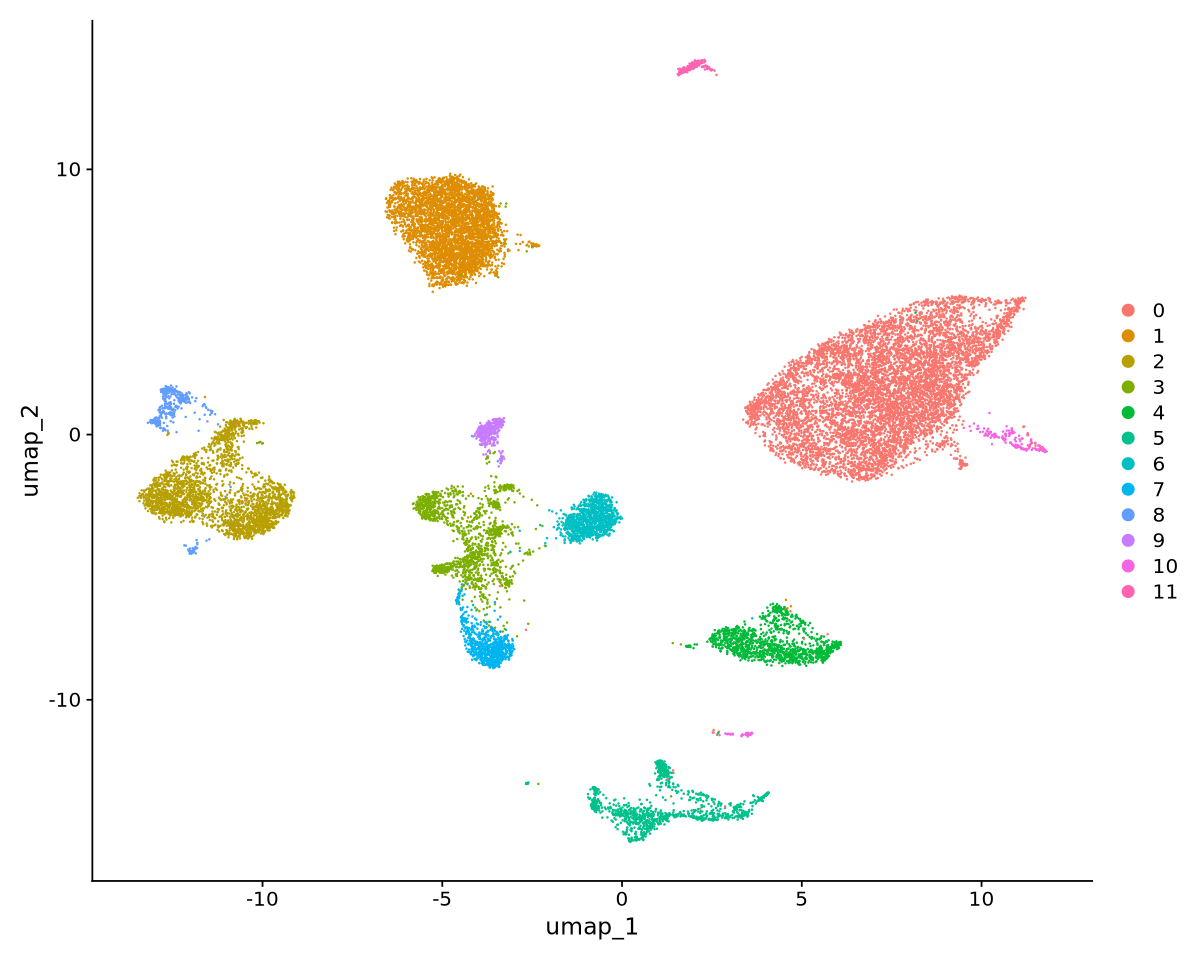

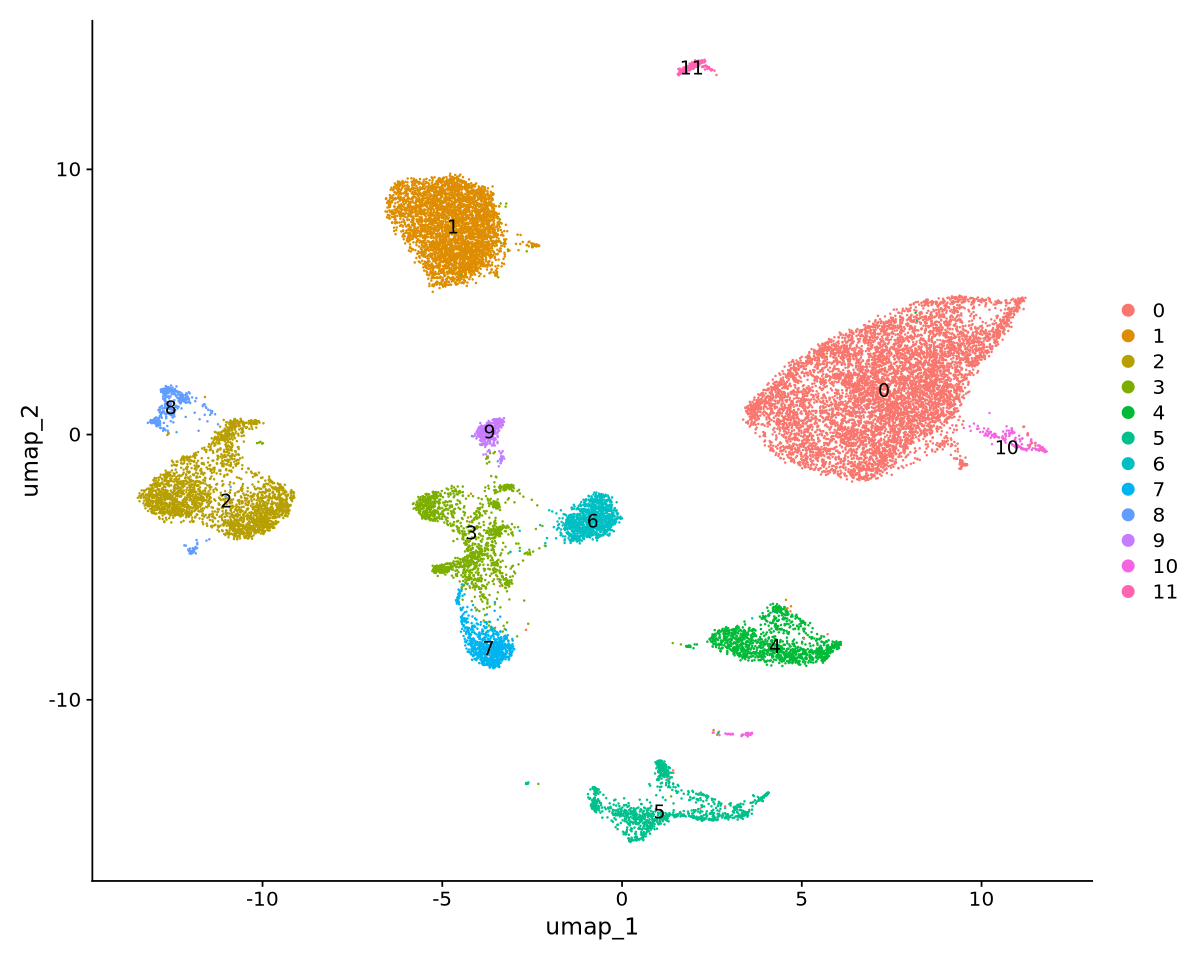

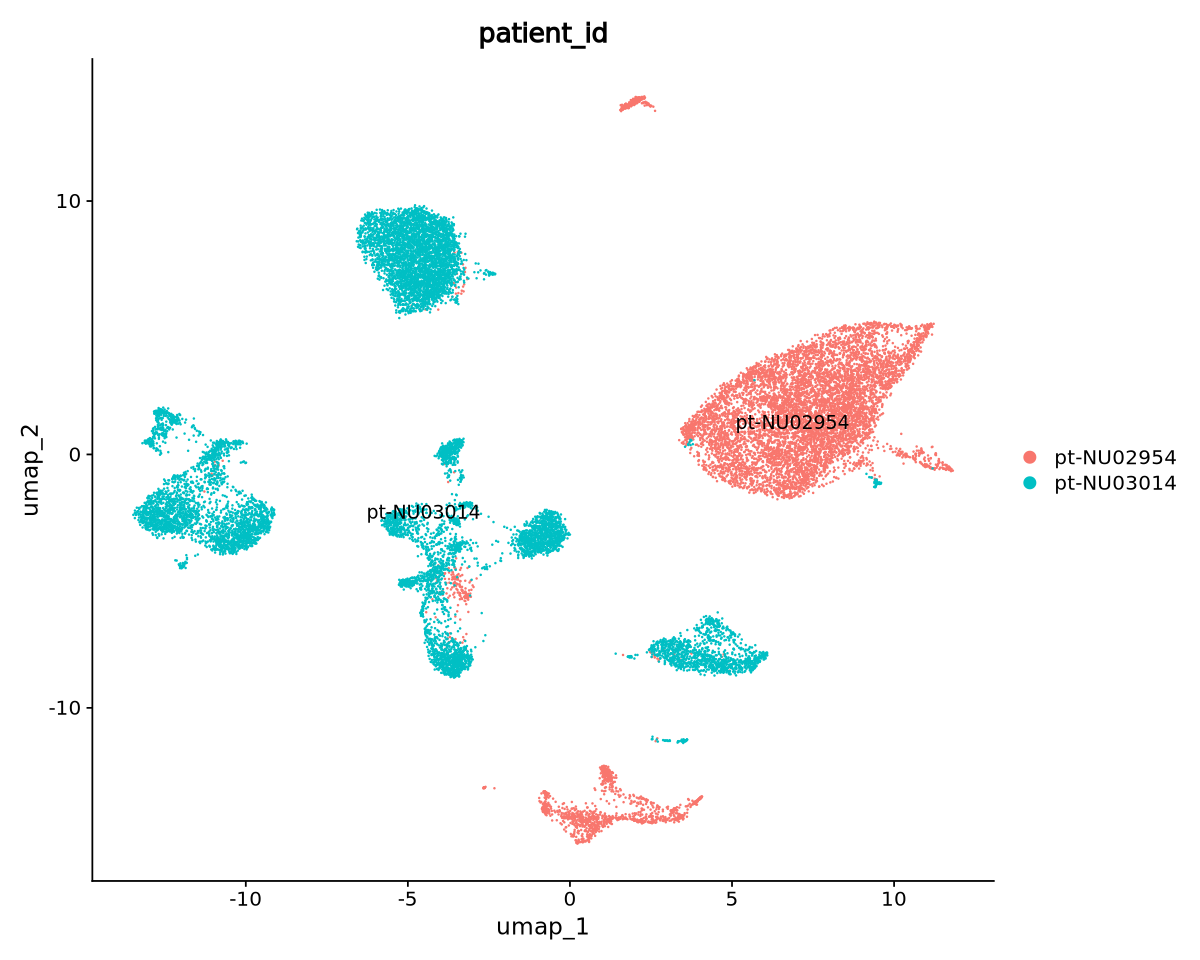

In [19]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(GBM, reduction = "umap")
DimPlot(GBM, reduction = "umap", label=TRUE)
DimPlot(GBM, reduction = "umap", label=TRUE, group = "patient_id")

#### Dataset seperating by patient, keep in mind below

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(GBM, file = "/scratch/user/s4436039/scdata/GSE224090/GSE224090.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

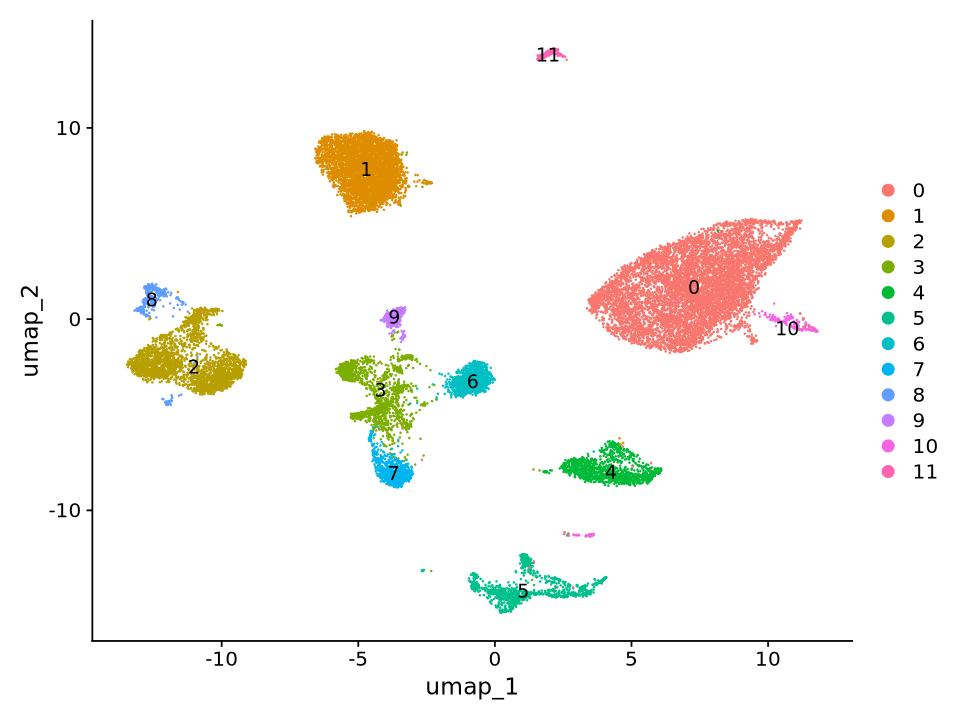

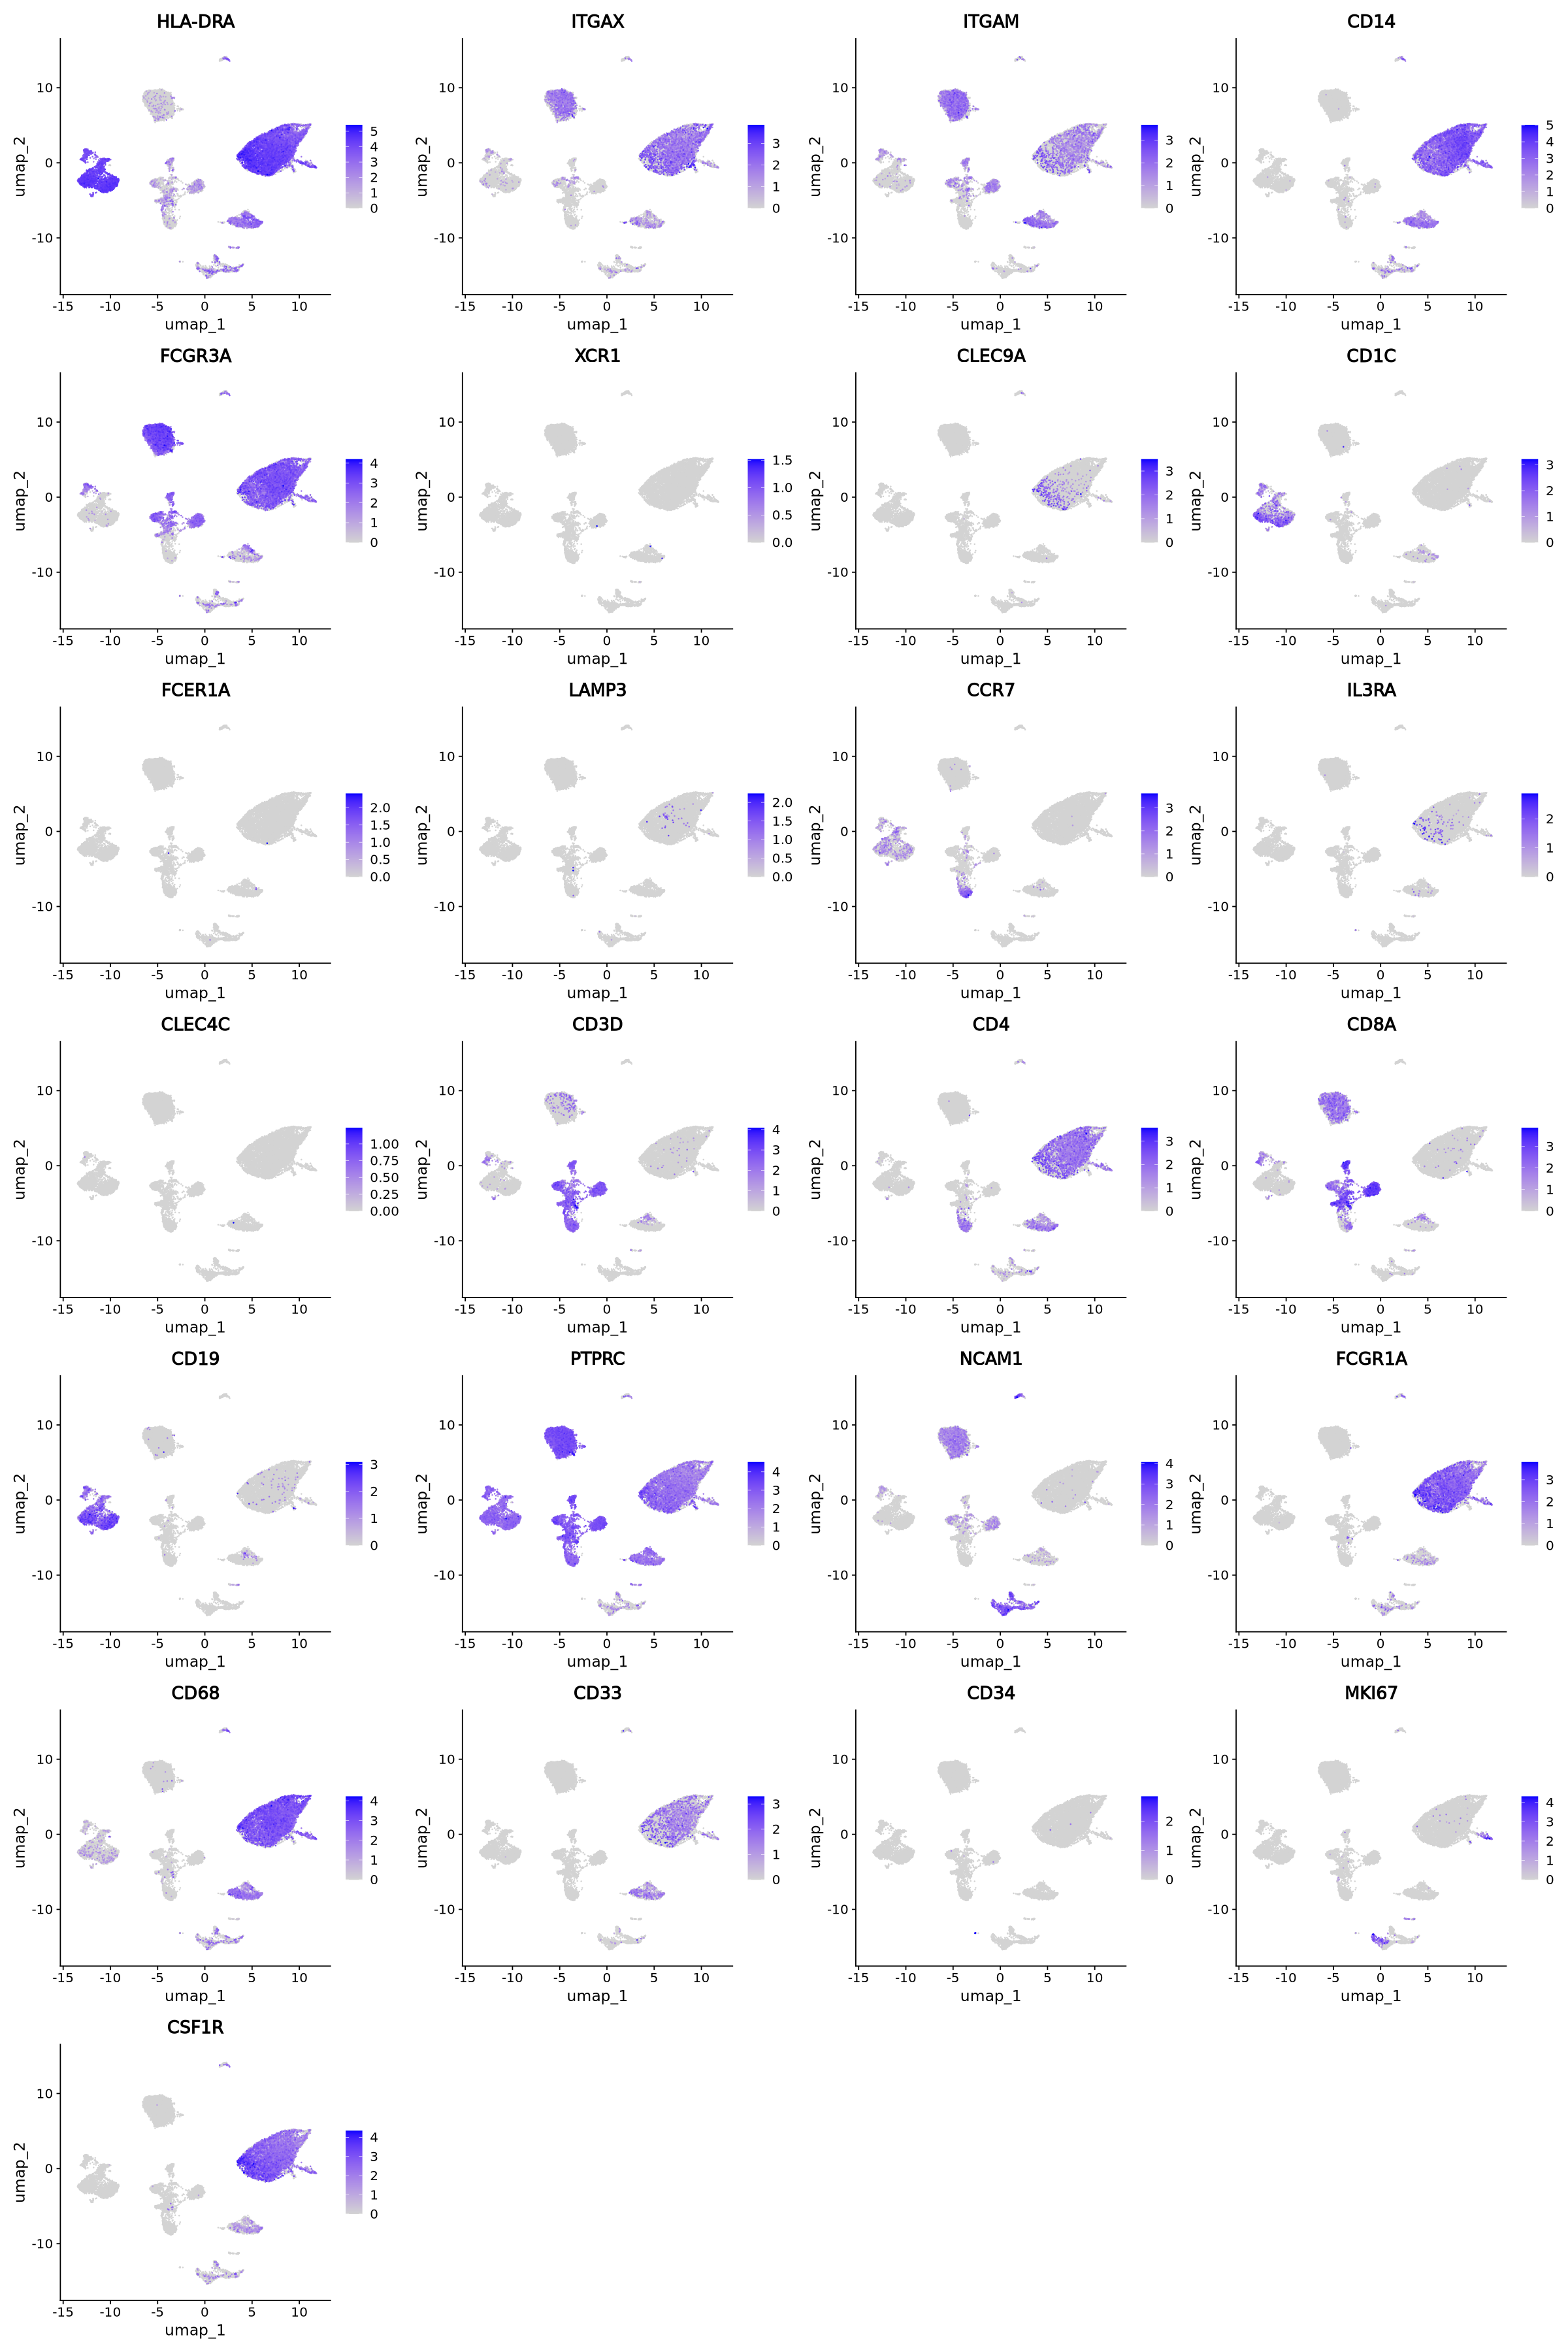

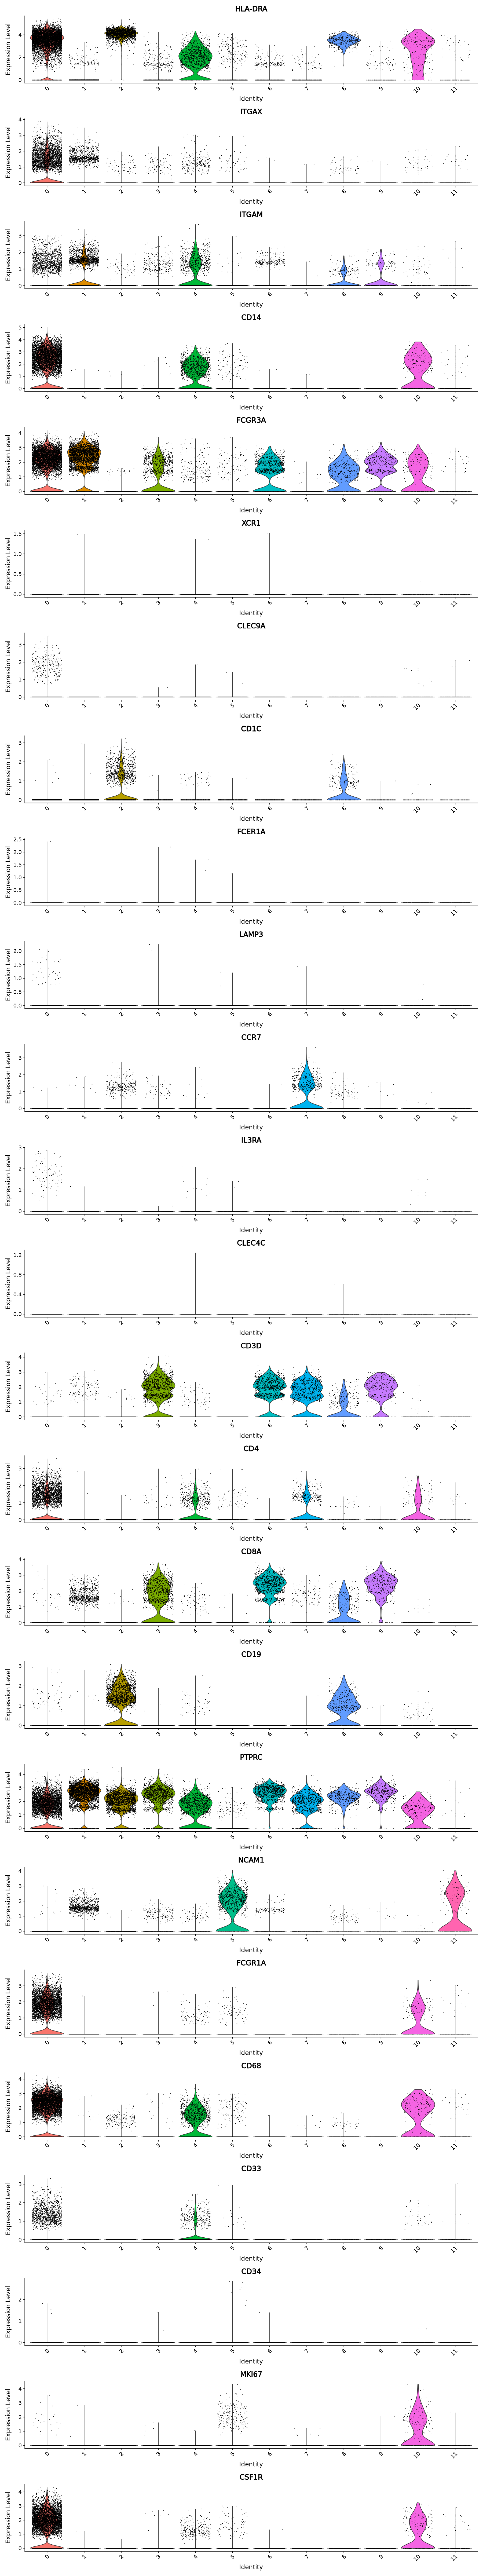

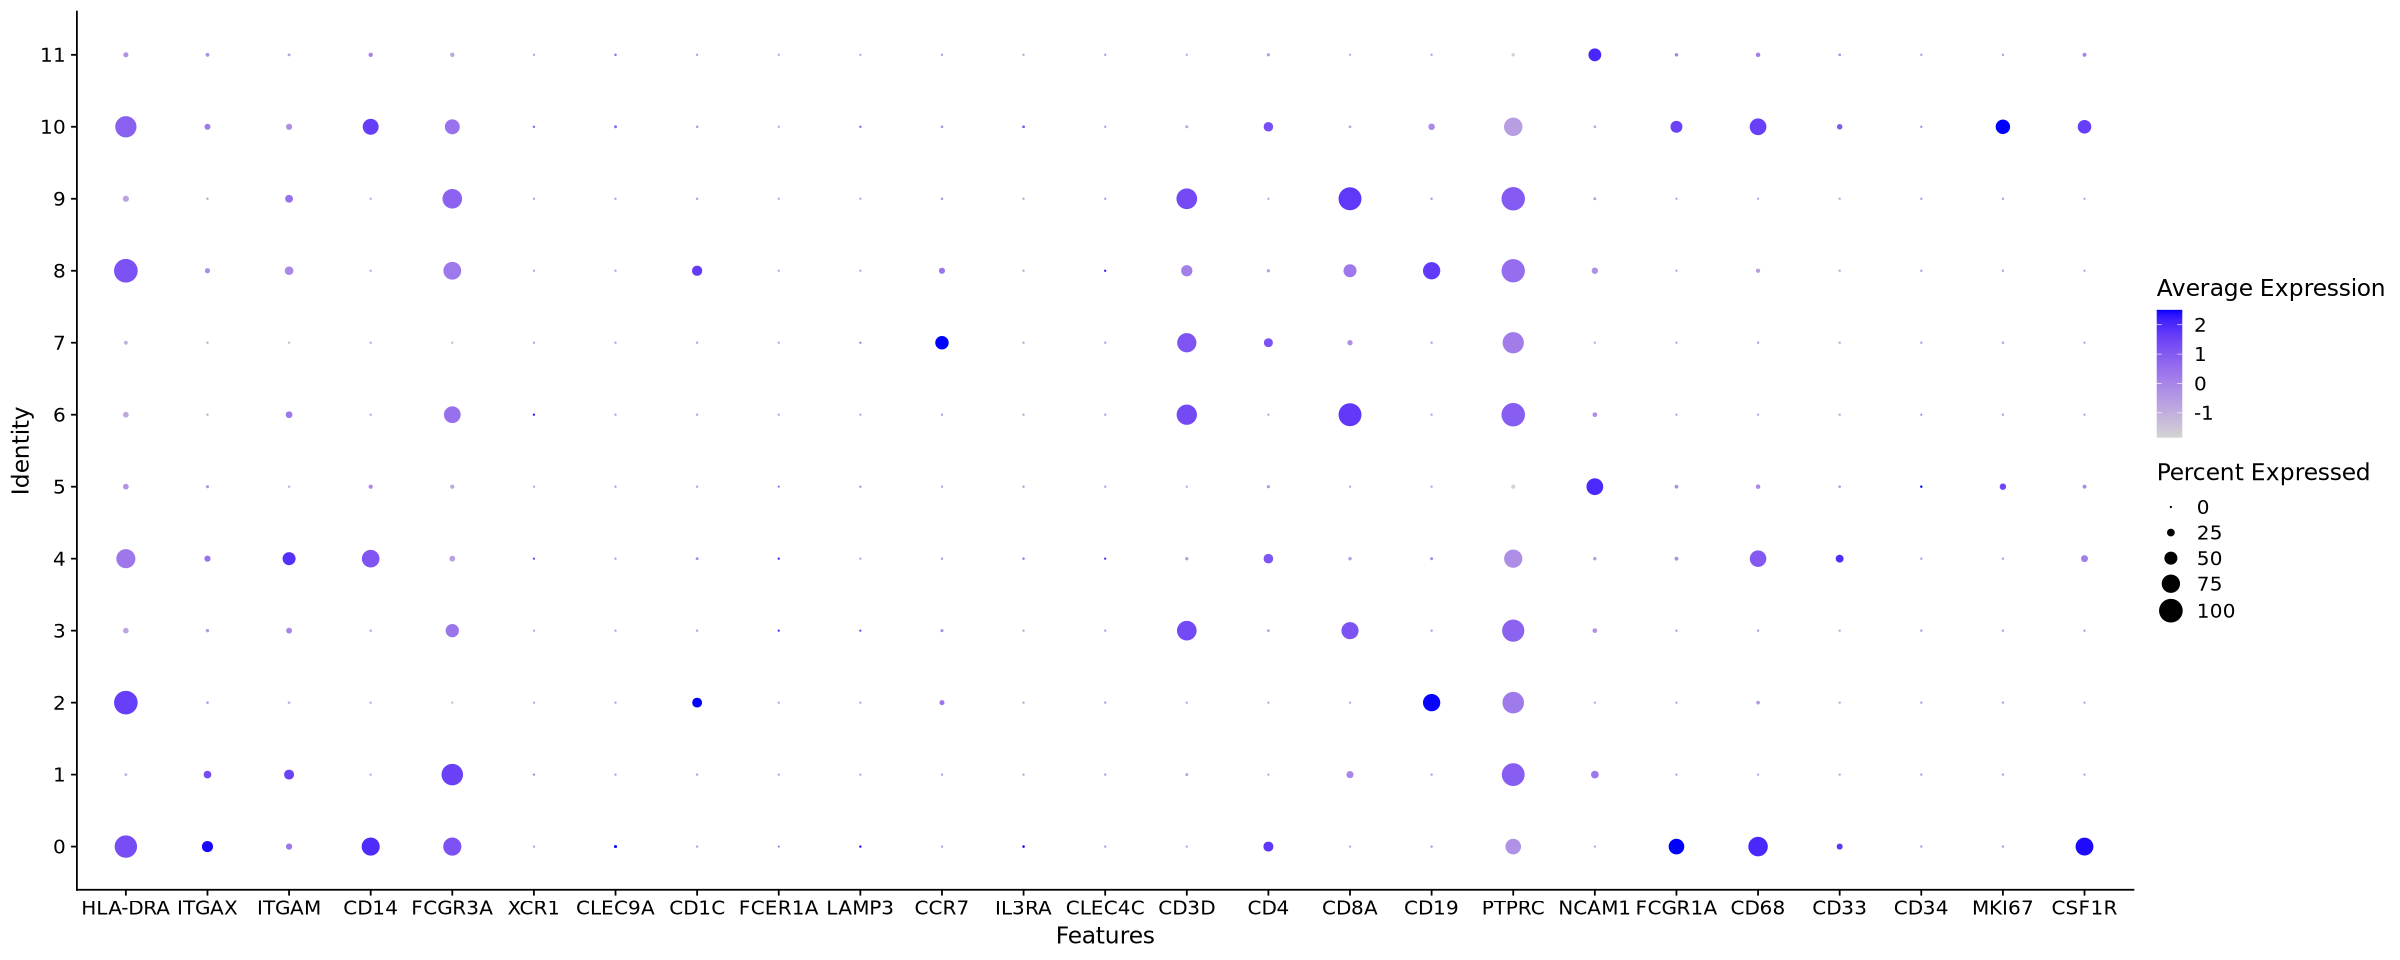

In [21]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(GBM, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(GBM, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 0, 4, 10 are the myeloid cells, now subsetting out these clusters

In [22]:
head(GBM@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090   2350      1233        
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090   5452      1957        
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090   3364      1633        
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090  14321      3352        
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090   3694      1587        
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090   4302      1617        
                                         sample_type cancer_type patient_id
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 tumour      GBM         pt-NU02954
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 tumour      GBM         pt-NU02954
                                         sample_id             percent.mt
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 GSE224090_GBM_NU02954 1.2340426 
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 GSE224090_GBM_NU02954 1.6691123 
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 GSE224090_GBM_NU02954 1.3376932 
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 GSE224090_GBM_NU02954 0.8309476 
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 GSE224090_GBM_NU02954 0.3789930 
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 GSE224090_GBM_NU02954 2.5104603 
                                         RNA_snn_res.0.2 seurat_clusters
GSE224090_GBM_NU02954_AAACCTGAGAGTACCG-1 0               0              
GSE224090_GBM_NU02954_AAACCTGCAGCCTATA-1 0               0              
GSE224090_GBM_NU02954_AAACCTGCAGCGTAAG-1 0               0              
GSE224090_GBM_NU02954_AAACCTGCAGCTATTG-1 0               0              
GSE224090_GBM_NU02954_AAACCTGGTAAATACG-1 0               0              
GSE224090_GBM_NU02954_AAACCTGGTGCGAAAC-1 0               0

In [23]:
myeloid_GBM <- subset(GBM, subset = RNA_snn_res.0.2 %in% c("0","4","10"))

In [24]:
GBM
myeloid_GBM

An object of class Seurat 
36601 features across 20913 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, data.2, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
36601 features across 8983 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, data.2, scale.data
 2 dimensional reductions calculated: pca, umap

In [25]:
saveRDS(myeloid_GBM, "/scratch/user/s4436039/scdata/GSE224090/GSE224090_myeloid.RDS")

#### Following the above then need to move entire GSE224090 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE224090/ /QRISdata/Q5935/nikita/scdata/GSE224090
```